In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Download historical stock data for TSMC (2330.TW) from 2000-01-01 onwards
tsmc_data = yf.download("2330.TW", start="2000-01-01")

# Display the first few rows of the DataFrame
display(tsmc_data.head())

/tmp/ipython-input-3171011296.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
Date,,,,,
2000-01-04,33.649895,33.649895,33.082766,33.649895,200662336736
2000-01-05,34.406013,34.406013,33.271756,33.649902,402466805912
2000-01-06,33.649895,34.406006,33.649895,34.217023,197545715802
2000-01-07,32.704624,33.082770,32.137495,32.515641,235270344752
2000-01-10,33.838882,34.027865,33.082771,33.649900,276171685539


In [ ]:
tsmc_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
Date,,,,,
2025-09-22,1295.0,1295.0,1270.0,1270.0,28859955
2025-09-23,1340.0,1340.0,1315.0,1320.0,33953781
2025-09-24,1340.0,1355.0,1325.0,1350.0,44737182
2025-09-25,1320.0,1330.0,1320.0,1320.0,25861812
2025-09-26,1300.0,1315.0,1295.0,1310.0,25793295


In [ ]:
tsmc_data.shape

(6406, 5)

In [ ]:
tsmc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6406 entries, 2000-01-04 to 2025-09-26
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, 2330.TW)   6406 non-null   float64
 1   (High, 2330.TW)    6406 non-null   float64
 2   (Low, 2330.TW)     6406 non-null   float64
 3   (Open, 2330.TW)    6406 non-null   float64
 4   (Volume, 2330.TW)  6406 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 300.3 KB


In [ ]:
tsmc_data.isnull().sum()

,,0
Price,Ticker,
Close,2330.TW,0
High,2330.TW,0
Low,2330.TW,0
Open,2330.TW,0
Volume,2330.TW,0


In [ ]:
tsmc_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
count,6406.000000,6406.000000,6406.000000,6406.000000,6.406000e+03
mean,188.713892,190.193738,187.177285,188.753436,1.774035e+10
std,259.840854,261.860406,257.812957,259.902159,4.085259e+10
min,13.266139,13.340787,13.005410,13.042555,0.000000e+00
25%,30.430505,30.827790,29.999535,30.469175,2.776226e+07
50%,58.075481,58.496830,57.583907,58.180803,4.205475e+07
75%,208.551411,210.225828,206.835101,208.551408,9.304710e+07
max,1340.000000,1355.000000,1325.000000,1350.000000,4.476381e+11


In [ ]:
tsmc_data = tsmc_data.reset_index()

In [ ]:
tsmc_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2000-01-04,33.649895,33.649895,33.082766,33.649895,200662336736
1,2000-01-05,34.406013,34.406013,33.271756,33.649902,402466805912
2,2000-01-06,33.649895,34.406006,33.649895,34.217023,197545715802
3,2000-01-07,32.704624,33.082770,32.137495,32.515641,235270344752
4,2000-01-10,33.838882,34.027865,33.082771,33.649900,276171685539


In [ ]:
tsmc_data.columns

MultiIndex([(  'Date',        ''),
            ( 'Close', '2330.TW'),
            (  'High', '2330.TW'),
            (   'Low', '2330.TW'),
            (  'Open', '2330.TW'),
            ('Volume', '2330.TW')],
           names=['Price', 'Ticker'])

In [ ]:
# Candlesticks: Search candlesticks for stock
import plotly.graph_objects as go
import plotly.io as pio

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

fig = go.Figure(data=[go.Candlestick(x = tsmc_data['Date'],
                      open = tsmc_data['Open'],
                      high = tsmc_data['High'],
                      low = tsmc_data['Low'],
                      close = tsmc_data['Close'])])

# fig.update_Layout(xaxis_rangeslider_visible=False)
# fig.show()
# pio.renderers.default = 'notebook_connected'  # or 'jupyterlab'
configure_plotly_browser_state()
pio.show(fig)

In [ ]:
tsmc_data.to_csv('tsmc_data.csv')

In [ ]:
data01 = pd.read_csv("tsmc_data.csv")

In [ ]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
1,0,2000-01-04,33.64989471435547,33.64989471435547,33.08276604747337,33.64989471435547,200662336736
2,1,2000-01-05,34.40601348876953,34.40601348876953,33.271755910269256,33.649901974915345,402466805912
3,2,2000-01-06,33.64989471435547,34.40600606506526,33.64989471435547,34.21702338123757,197545715802
4,3,2000-01-07,32.70462417602539,33.0827702066201,32.137495437844194,32.5156414684389,235270344752


In [ ]:
# Candlesticks: Search candlesticks for stock
import plotly.graph_objects as go

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

fig = go.Figure(data=[go.Candlestick(x = data01['Date'],
                      open = data01['Open'],
                      high = data01['High'],
                      low = data01['Low'],
                      close = data01['Close'])])

configure_plotly_browser_state()
fig.show()

In [ ]:
tsmc_data.drop(['Date'], axis=1, inplace=True)

/tmp/ipython-input-793987274.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [ ]:
tsmc_data.head()

Price,Close,High,Low,Open,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,33.649895,33.649895,33.082766,33.649895,200662336736
1,34.406013,34.406013,33.271756,33.649902,402466805912
2,33.649895,34.406006,33.649895,34.217023,197545715802
3,32.704624,33.082770,32.137495,32.515641,235270344752
4,33.838882,34.027865,33.082771,33.649900,276171685539


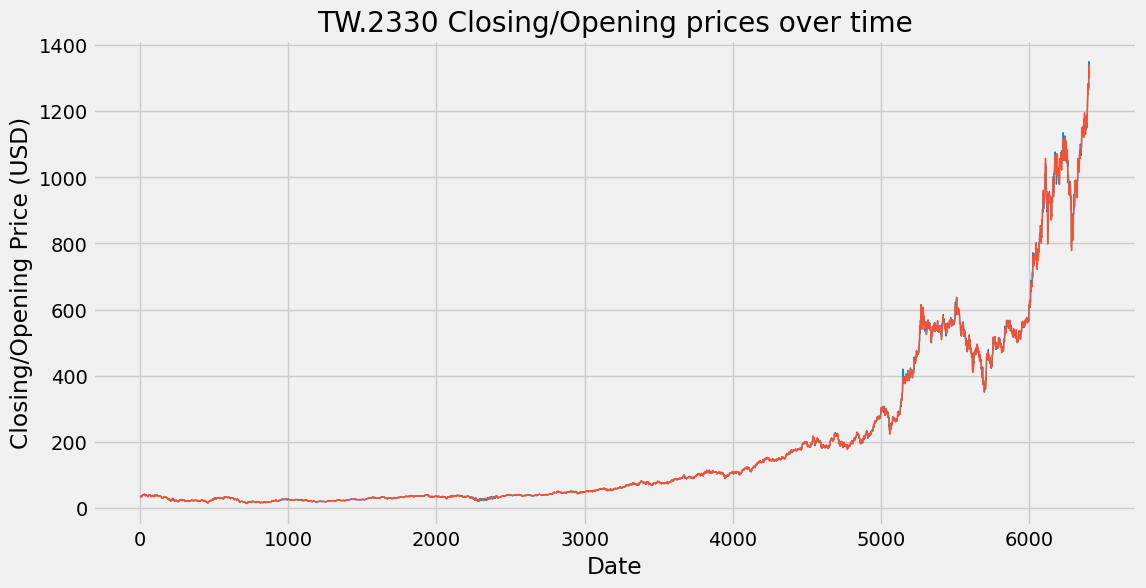

In [ ]:
import matplotlib.pyplot as plt
# import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

stock = "TW.2330"
plt.figure(figsize=(12,6))
plt.plot(tsmc_data['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.plot(tsmc_data['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing/Opening prices over time')
plt.xlabel('Date')
plt.ylabel('Closing/Opening Price (USD)')
plt.show()


In [ ]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> NaN NaN NaN NaN 30.0 40.0 50.0
# 10 + 20 + 30 + 40 + 50 / 5
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[0:5])/5)
print(sum(temp_data[1:6])/5)
print(sum(temp_data[2:7])/5)
print(sum(temp_data[3:8])/5)
print(sum(temp_data[4:9])/5)

30.0
40.0
50.0
60.0
70.0


In [ ]:
import pandas as pd
df01 = pd.DataFrame(temp_data)
df01

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90


In [ ]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [ ]:
ma100 = tsmc_data.Close.rolling(100).mean()

In [ ]:
ma100

Ticker,2330.TW
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6401,1090.449992
6402,1094.427822
6403,1098.524669
6404,1102.600041


In [ ]:
ma200 = tsmc_data.Close.rolling(200).mean()

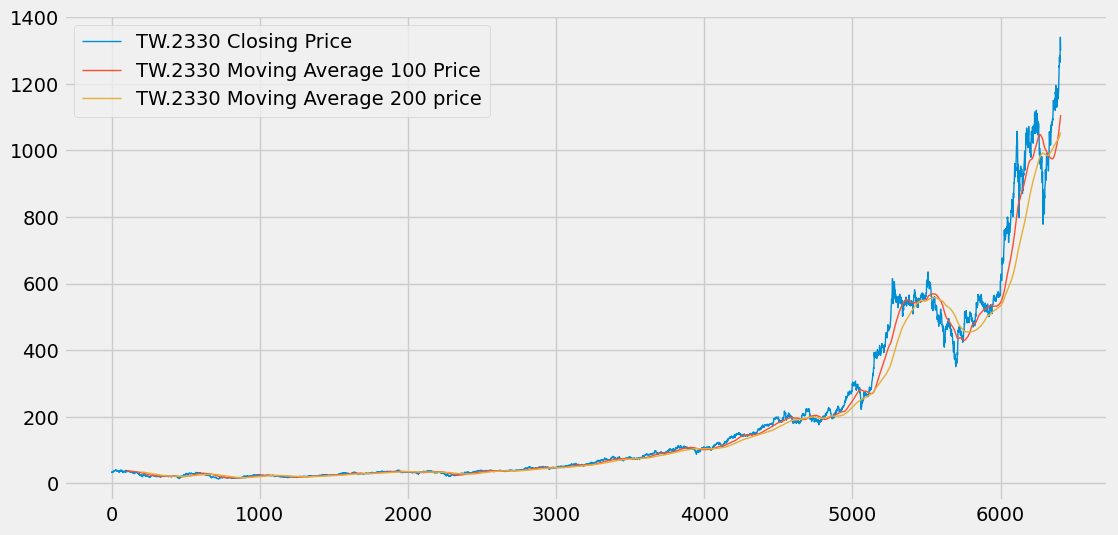

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(tsmc_data.Close, label = f'{stock} Closing Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
data_full_array = scaler.fit_transform(tsmc_data['Close'])

In [ ]:
scaler.scale_

array([0.00075373])

In [ ]:
# Divide data for Training & Testing
data_training = pd.DataFrame(data_full_array[0:int(len(tsmc_data)*0.70)])
data_testing = pd.DataFrame(data_full_array[int(len(tsmc_data)*0.70): int(len(tsmc_data))])

In [ ]:
data_training.shape

(4484, 1)

In [ ]:
data_testing.shape

(1922, 1)

In [ ]:
data_training.shape[0]

4484

In [ ]:
data_training.shape[1]

1

In [ ]:
import numpy as np
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100:i]) # 前 100天
    y_train.append(data_training[i:i+1][0]) # 今天

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
y_train.shape

(4384, 1)

In [ ]:
x_train.shape

(4384, 100, 1)

In [ ]:
# Model Building
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1],1)))

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 4.1800e-04
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 7.8231e-05
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 5.7125e-05
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 5.2806e-05
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.9649e-05
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 5.5263e-05
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 5.7541e-05
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.7526e-05
Epoch 9/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 4.5233e-05
Epoch 10/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.6819e-05
Epoch 11/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 5.0198e-05
Epoch 12/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.5469e-05
Epoch 13/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.3069e-05
Epoch 14/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - los

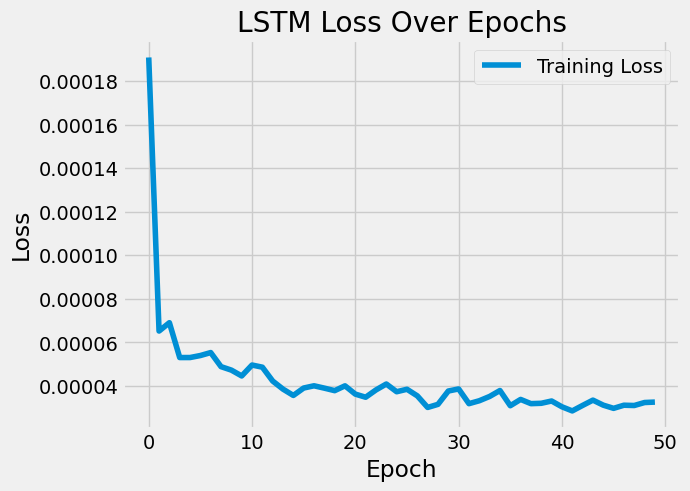

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
past_100_days

,0
4384,0.113790
4385,0.114088
4386,0.113491
4387,0.114088
4388,0.116176
...,...
4479,0.135485
4480,0.137334
4481,0.139800
4482,0.139800


In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,0
0,0.113790
1,0.114088
2,0.113491
3,0.114088
4,0.116176


In [ ]:
x_test = []
y_test = []

for i in range(100, final_df.shape[0]):
    x_test.append(final_df[i-100:i])
    y_test.append(final_df[i:i+1][0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1922, 100, 1)

In [ ]:
y_test.shape

(1922, 1)

In [ ]:
y_predicted = model.predict(x_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


In [ ]:
y_predicted.shape

(1922, 1)

In [ ]:
scaler.scale_

array([0.00075373])

In [ ]:
scaler.scale_[0]

np.float64(0.0007537306685375659)

In [ ]:
y_predicted = y_predicted / scaler.scale_[0]
y_test = y_test / scaler.scale_[0]

In [ ]:
y_test

array([[ 183.84201527],
       [ 182.2063036 ],
       [ 182.61519337],
       ...,
       [1326.73386097],
       [1306.73386097],
       [1286.73386097]])

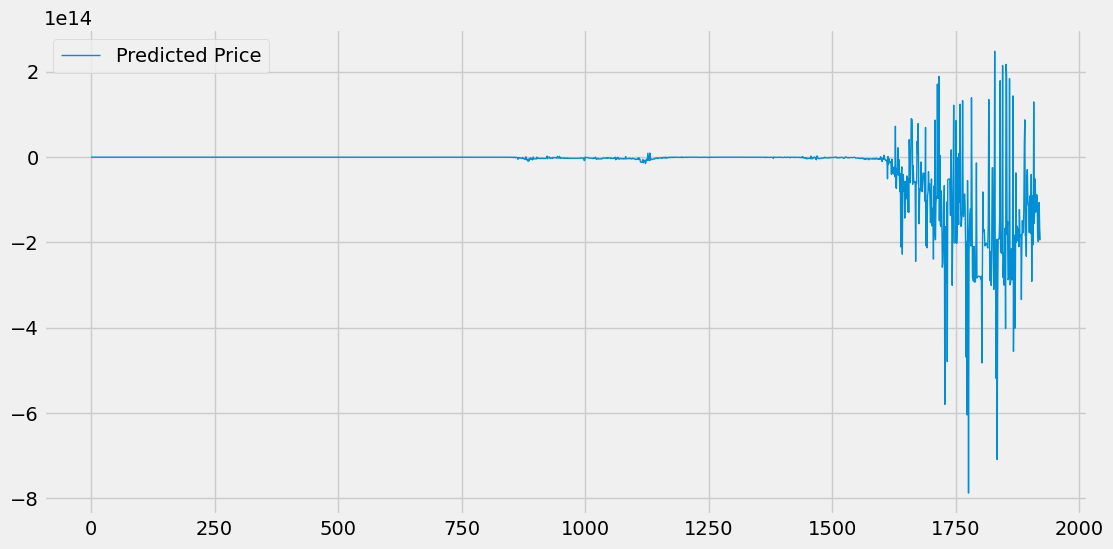

In [ ]:
plt.figure(figsize=(12,6))
#plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

## GRU 模型

In [ ]:
from keras.layers import GRU, Dropout, SimpleRNN , Dense
from keras.models import Sequential
gru_model = Sequential()

# Input Shape
gru_model.add(Input(shape=(x_train.shape[1],1)))
# First GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Second GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Third GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Fourth GRU layer with dropout
gru_model.add(GRU(50))
gru_model.add(Dropout(0.2))

# Output layer
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')

gru_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 100, 50)        │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
gru_model.fit(x_train, y_train, epochs=50)

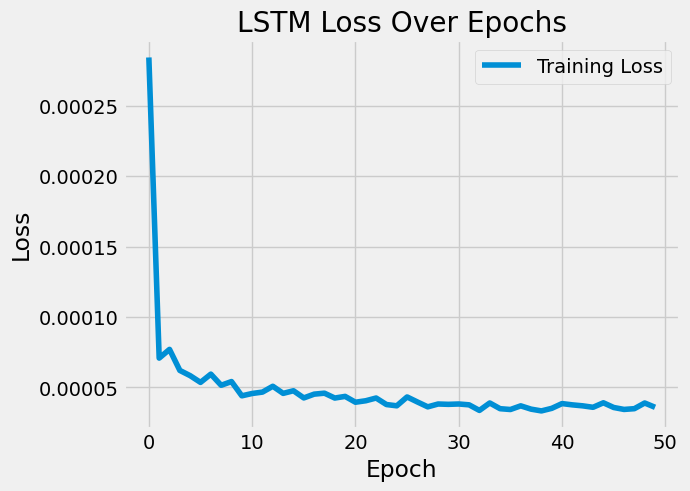

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Loss Over Epochs')
plt.legend()
plt.show()